## General Imports
These imports will be used for a majority of the tasks listed below.  More specific imports can be found in the task section.

In [2]:
from astropy.io import fits
import numpy as np

### _imaxis ???

### chpixtype

**There's a bug related to the bzero/bunit keyword not being set that I think already has a fix in the dev version.  We'll have to get back to this task when these changes go into the release version:
https://github.com/astropy/astropy/pull/5053/files **

Old type options in chpixtype were: 
``ushort``, ``short``, ``int``, ``long``, ``real``, ``double``, ``complex``

Options available with astropy are 
* 'uint8': 8, 
* 'int16': 16, 
* 'uint16': 16, 
* 'int32': 32,
* 'uint32': 32, 
* 'int64': 64, 
* 'uint64': 64, 
* 'float32': -32,
* 'float64': -64

Conversions:
* ``ushort`` : ``uint16``
* ``short`` : ``int16``
* ``int`` : ``int32``
* ``long`` : ``int62``
* ``real`` : ``float32``
* ``double`` : ``float64``
* ``complex`` : ``complex64`` or ``complex128``

any of the int sizes in ``astropy/numpy`` can be changed to an unsigned integer

In [21]:
# Change this value to your desired data file, here were making creating a filename
# for our new changed data
orig_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
new_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_newdtype_flt.fits'

# Read in your fits file and make copy, close original file
hdu = fits.open(orig_data)
hdu.close()

# Take copy and edit datatype
#hdu[1].scale(type='int16')

# Save changed hdu
hdu.writeto(new_data)

### hedit

In [27]:
# Change this value to your desired data file
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Open fits file
hdu = fits.open(test_data, mode='update')

# Simple header change, will add keyword if it doesn't not exist
hdu[0].header['MYKEY1'] = 'Editing this keyword'

# Only add keyword if it does not already exist:
if 'MYKEY2' not in hdu[0].header:
    hdu[0].header['MYKEY2'] = 'Also editing this'

# To delete keywords, first check if they exist:
if 'MYKEY2' in hdu[0].header:
    del hdu[0].header['MYKEY2']
    
# Close fits file, this will save your changes
hdu.close()

### hselect

In [29]:
"In progress..."

'In progress...'

### imarith

Imarith is easy to replace with basic astropy.io functionality

In [62]:
#Basic operands (+,-,/,*)
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imarith_out.fits'

# Open fits file
hdu1 = fits.open(test_data1)
hdu2 = fits.open(test_data2)

# Do the math
hdu1[1].data += hdu2[1].data

# If you are dividing and need to avoid zeros in the image use indexing
indx_zeros = [hdu2[4].data == 0]
indx_nonzeros = [hdu2[4].data != 0]
# Set this value as you would the divzero parameter in imarith
set_zeros = 999.9
hdu1[4].data[indx_nonzeros] /= hdu2[4].data[indx_nonzeros]
hdu1[4].data[indx_zeros] = 999.9

# Save your new file
hdu1.writeto(output_data, clobber=True)

# Close hdu files
hdu1.close()
hdu2.close()

### imcopy

In [63]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imcopy_out.fits'

hdu = fits.open(test_data)
hdu.writeto(output_data)
hdu.close()

### imdelete - yeah.. no...

### imdivide

please see images.imutil.imarith

### imexpr

**Are people using this? Which parts?  There's a lot here that can be done already in astropy/numpy, but hard to tell what people are actually using.**

### imfunction

Here we use ``np.vectorize``, which can make any python function apply to each element of your array.  But keep in mind that ``np.vectorize`` is esentially looping over the array, and may not be the most efficient method.

In [77]:
import math

In [76]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imfunction_out.fits'

# Here we use the cosine function as an example
hdu = fits.open(test_data)
sci = hdu[1].data
vcos = np.vectorize(math.cos)

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = vcos(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal fits file.
hdu.writeto(output_data)
hdu.close()

### imgets

**I don't think we need to include this... there's a note in the help file that says it was mostly used internaly within CL's other tasks**

**We can just put a note here that says, see imheader**

In [81]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Convenience functions like 'getval' can be used to easily grab parts
# of a fits file
my_value = fits.getval(test_data,'CRPIX1',ext=1)

# If your value in not a string, but you would like one
my_value = str(my_value)

### imheader

Here we can use another ``astropy`` convenience function

In [84]:
import glob

In [87]:
# Change these values to your desired data files, glob will capture all wildcard matches
test_data = glob.glob('/eng/ssb/iraf_transition/test_data/iczgs3y*')

for filename in test_data:
    fits.info(filename)

Filename: /eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     266   ()              
1    SCI         ImageHDU       140   (1014, 1014)   float32   
2    ERR         ImageHDU        51   (1014, 1014)   float32   
3    DQ          ImageHDU        43   (1014, 1014)   int16   
4    SAMP        ImageHDU        37   (1014, 1014)   int16   
5    TIME        ImageHDU        37   (1014, 1014)   float32   
6    WCSCORR     BinTableHDU     59   7R x 24C     [40A, I, A, 24A, 24A, 24A, 24A, D, D, D, D, D, D, D, D, 24A, 24A, D, D, D, D, J, 40A, 128A]   
Filename: /eng/ssb/iraf_transition/test_data/iczgs3ygq_newdtype_flt.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1    SCI         ImageHDU       140   (1014, 1014)   float32   
Filename: /eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits
No.    Name         Type      Cards   Dimension

### imhistogram

To make a histogram we are going to use matplotlibs ``hist`` function.  See the ``hist`` documentation for options to change the histogram type, scaling, bin sizes, and more.

In [90]:
import matplotlib.pyplot as plt

# Let's also make our plots show up in this notebook window
%matplotlib inline  

(array([  1.44100000e+03,   1.80000000e+01,   1.30000000e+01,
          1.20000000e+01,   1.60000000e+01,   1.00000000e+01,
          1.00000000e+01,   8.00000000e+00,   1.40000000e+01,
          1.70000000e+01,   1.70000000e+01,   2.40000000e+01,
          2.80000000e+01,   1.20000000e+01,   1.60000000e+01,
          2.70000000e+01,   2.40000000e+01,   2.50000000e+01,
          3.10000000e+01,   3.60000000e+01,   3.20000000e+01,
          4.10000000e+01,   4.90000000e+01,   5.40000000e+01,
          5.30000000e+01,   7.40000000e+01,   7.00000000e+01,
          8.70000000e+01,   1.31000000e+02,   1.16000000e+02,
          1.55000000e+02,   2.84000000e+02,   6.03000000e+02,
          1.73300000e+03,   5.10900000e+03,   1.43540000e+04,
          3.34160000e+04,   6.46180000e+04,   1.04189000e+05,
          1.40527000e+05,   1.57545000e+05,   1.49016000e+05,
          1.19350000e+05,   8.18350000e+04,   4.99790000e+04,
          2.78070000e+04,   1.54370000e+04,   8.91300000e+03,
        

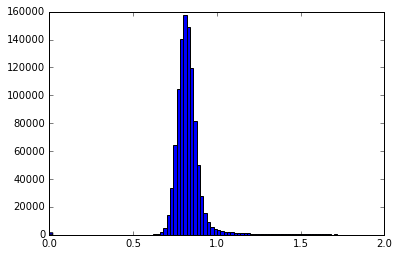

In [96]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, we also need to flatten the data before sending it to hist
sci1 = fits.getdata(test_data,ext=1)
sci1f = sci1.flatten()

# Now we can plot our histogram, using some of the optional keywords in hist
plt.hist(sci1f,bins=100,range=(0,2))

### imrename - NO

### imreplace

We can use simple ``numpy`` array manipulation to replicate imreplace.  For details on how to grow the boolean array for replacement see crgrow, or the ``skimage.dilation`` documentation

In [124]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, make boolean mask with your requirements
hdu = fits.open(test_data)
sci1 = hdu[1].data
mask = np.logical_and(sci1>0.5, sci1<0.6)

# Use mask to replace values
new_value = 999
sci1[mask] = new_value

# We are not saving changes here
hdu.close()

### imslice

**Need a datacube image, also, see below note**

### imstack

**This might benefit from a function, it's using some logic for the WCS solutions**

### imstatistics

**another good candidate for a command line wrapper**

We will use the ``astropy.stats.sigma_clipped_stats`` function here, which has some wider capabilites then the imstatistics function.  Please see the ``stats`` package documentation for details on the advanced usage.

In [9]:
from astropy import stats

In [12]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
sci1 = fits.getdata(test_data,ext=1)

# The sigma_clipped_stats function returns the mean, median, and stddev respectively
output = stats.sigma_clipped_stats(sci1,sigma=2.0,iters=3)
print output

(0.82121155347072006, 0.81694626808166504, 0.058198063937460652)


### imsum

We will be using the ``ccdproc`` ``Combiner`` class here.  Keep in mind that the original fits header is not retained in the ``CCDData`` object.  Please see the documentation for more details

In [15]:
from ccdproc import CCDData, Combiner

In [40]:
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# First we need to pull out the science arrays to create CCDData objects
# Our acutal unit is electrons/sec, this is not accepted by the current
# set of units
cdata1 = CCDData.read(test_data1, hdu=1, unit='electron')
cdata2 = cdata1.copy()
cdata3 = CCDData.read(test_data2, hdu=1, unit='electron')
cdata4 = cdata3.copy()
combiner = Combiner([cdata1, cdata2, cdata3, cdata4])

# Now we can make our mask for extrema clipping
# The equivalent of low_reject, high_reject parameter
combiner.clip_extrema(nlow=1, nhigh=1)

# And finally to combine...
final_combine = combiner.average_combine()
print final_combine.data

INFO: using the unit electron passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [ccdproc.ccddata]
INFO: using the unit electron passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [ccdproc.ccddata]
[[  0.87720111   0.82106587   0.79521415 ...,   3.87308204   7.41545987
    9.01969481]
 [  0.89028609   0.7884455    0.8240625  ...,   0.86163342   4.53510189
    0.99109203]
 [  0.81683022   0.83273572   0.82175627 ...,   3.60699821  -7.82266164
    2.95994186]
 ..., 
 [ 40.72796059  15.36561799  -8.79329443 ...,  22.68277168  25.31048012
   28.829813  ]
 [ 46.28870392  -4.50218874   1.74757147 ...,  13.24364138  25.70440292
   11.0971849 ]
 [ 42.8106432   29.66250706  63.18441772 ...,   0.           9.80057049
   22.66858006]]


### imtile

**This function just tiles together arrays, I don't think we need this unless there's an actual request...**

### listpixels

**I know of at least one person who still uses this quite a bit, I think we should add this as a command line function**

### minmax

**another candidate for a command line function?**

### sections

**I think this is mostly used internally in iraf for keeping track of image lists..**